In [1]:
import numpy as np
from AdaCapNet import *
from benchmarked_architectures import *
from get_dataset import get_dataset
from copy import deepcopy
import architectures
import torch
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
seed = 0
dataset_id = 0
input_name = "exotic"
input_repository = "./dataset_generation/ablation_datasets/"
train_size = 0.8
should_stratify = False
output_figure_path = "./figures/"
figure_name = "Learning_Dynamic"

MAX_iter = 5000
batch_size = 128

https://wetransfer.com/downloads/a91565174604cd5831d1fe55ac46616d20220808121843/df98bccb39f7f8b60061c5e43a5a0d0120220808121924/4dc3e5?utm_campaign=WT_email_tracking&utm_content=general&utm_medium=download_button&utm_source=notify_recipient_email

or, in case the link doesn't work, the dataset exists freely at https://challengedata.ens.fr/challenges/9 (login is free)

# Building Dataset

In [3]:
import pandas

features = pandas.read_csv("dataset_generation/exotic/training_input_mtaTRFH.csv").to_numpy()
features = features[:, 1:]
targets = pandas.read_csv("dataset_generation/exotic/training_output_aq7NYgj.csv").to_numpy()
targets=targets[:,1:]

dataset = np.concatenate([features, targets], axis=1)

with open("dataset_generation/ablation_datasets/exotic.npy", "wb+") as file:
    np.save(file, dataset)

# Learning

In [4]:
X_train, X_test, y_train, y_test = get_dataset(dataset_id, 
                                               input_name, 
                                               input_repository, 
                                               should_stratify = should_stratify,
                                               seed = seed)

In [5]:
RMSEs = []
R2s = []
columns = []

Adacap + SELU

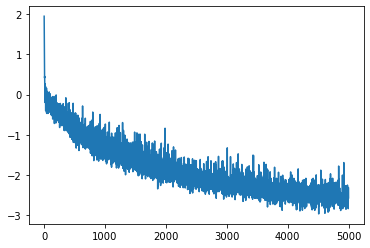

In [6]:
# Adacap + SELU
parameters = deepcopy(eval("adacapnetfast"))
parameters["hidden_params"]["n_features"] = X_train.shape[-1]
parameters["hidden_params"]["width"] = 1024
parameters["hidden_params"]["depth"] = 5
parameters["early_stopping"] = True
parameters["hidden_params"]["activation"] = "SELU"
parameters["batch_size"] = batch_size
parameters["learning_rate"] = 1e-4
parameters["max_iter"] = MAX_iter 
parameters["lr_scheduler"] = None
# Adacap
adacapSELU_reg = AdaCapNetRegressor(random_state = seed, **default_parameters)
adacapSELU_reg.fit(X_train, y_train)
adaSELUrecords = adacapSELU_reg.record

if "adacapSELU_reg" in locals().keys():
    adacapSELU_reg.delete_model_weights()
    del adacapSELU_reg

plt.plot(np.log(adaSELUrecords["loss"]))
plt.show()

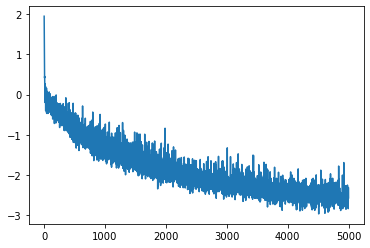

In [7]:
plt.plot(np.log(adaSELUrecords["loss"]))
plt.show()

In [8]:
default_parameters["max_iter"] = MAX_iter
adacapSELU_reg = AdaCapNetRegressor(random_state = seed, **default_parameters)
adacapSELU_reg.fit(X_train, y_train)

RMSEs.append(mean_squared_error(y_test, adacapSELU_reg.predict(X_test), squared=True))
R2s.append(adacapSELU_reg.score(X_test, y_test))

if "adacapSELU_reg" in locals().keys():
    adacapSELU_reg.delete_model_weights()
    del adacapSELU_reg

Regular SELU

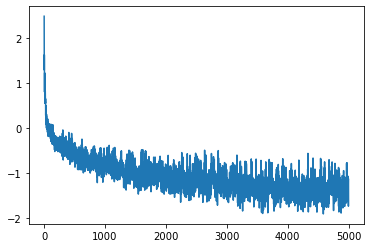

In [9]:
# regular
regular_parameters = parameters.copy()
regular_parameters["closeform_parameter_init"] = False
default_parameters["max_iter"] = MAX_iter
regular_parameters["hidden_params"]["output"] = 1
regSELU = AdaCapNetRegressor(random_state = seed, **regular_parameters)
regSELU.fit(X_train, y_train)
SELUrecords = regSELU.record

if "regSELU" in locals().keys():
    regSELU.delete_model_weights()
    del regSELU

plt.plot(np.log(SELUrecords["loss"]))
plt.show()

In [10]:
regular_parameters["max_iter"] = MAX_iter
regSELU = AdaCapNetRegressor(random_state = seed, **regular_parameters)
regSELU.fit(X_train, y_train)

RMSEs.append(mean_squared_error(y_test, regSELU.predict(X_test), squared=True))
R2s.append(regSELU.score(X_test, y_test))

if "regSELU" in locals().keys():
    regSELU.delete_model_weights()
    del regSELU

GLU adacap

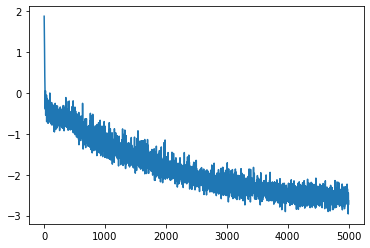

In [12]:
parameters = deepcopy(eval("adacapnetfast"))
parameters["hidden_params"]["n_features"] = X_train.shape[-1]
parameters["hidden_params"]["width"] = 1024
parameters["hidden_params"]["depth"] = 5
parameters["early_stopping"] = True
parameters["hidden_nn"] = architectures.GLULayers
parameters["learning_rate"] = 1e-4
parameters["max_iter"] = MAX_iter 
parameters["batch_size"] = batch_size
parameters["lr_scheduler"] = None
# Adacap
adacapGLU_reg = AdaCapNetRegressor(random_state = seed, **parameters)
adacapGLU_reg.fit(X_train, y_train)
adaGLUrecords = adacapGLU_reg.record

if "adacapGLU_reg" in locals().keys():
    adacapGLU_reg.delete_model_weights()
    del adacapGLU_reg

plt.plot(np.log(adaGLUrecords["loss"]))
plt.show()

In [13]:
parameters["max_iter"] = 5000
adacapGLU_reg = AdaCapNetRegressor(random_state = seed, **parameters)
adacapGLU_reg.fit(X_train, y_train)

RMSEs.append(mean_squared_error(y_test, adacapGLU_reg.predict(X_test), squared=True))
R2s.append(adacapGLU_reg.score(X_test, y_test))

if "adacapGLU_reg" in locals().keys():
    adacapGLU_reg.delete_model_weights()
    del adacapGLU_reg

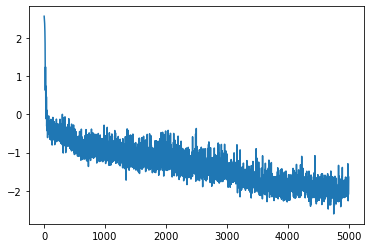

In [14]:
# regular
regular_parameters = parameters.copy()
regular_parameters["closeform_parameter_init"] = False
default_parameters["max_iter"] = MAX_iter
regular_parameters["hidden_params"]["output"] = 1
regGLU = AdaCapNetRegressor(random_state = seed, **regular_parameters)
regGLU.fit(X_train, y_train)
GLUrecords = regGLU.record

if "regGLU" in locals().keys():
    regGLU.delete_model_weights()
    del regGLU

plt.plot(np.log(GLUrecords["loss"]))
plt.show()

In [15]:
parameters["max_iter"] = 5000
regSELU = AdaCapNetRegressor(random_state = seed, **parameters)
regSELU.fit(X_train, y_train)

RMSEs.append(mean_squared_error(y_test, regSELU.predict(X_test), squared=True))
R2s.append(regSELU.score(X_test, y_test))

if "regSELU" in locals().keys():
    regSELU.delete_model_weights()
    del regSELU

In [20]:
parameters = deepcopy(eval("adacapnetfast"))
parameters["hidden_params"]["n_features"] = X_train.shape[-1]
parameters["hidden_params"]["width"] = 1024
parameters["hidden_params"]["depth"] = 5
parameters["early_stopping"] = True
parameters["hidden_nn"] = architectures.ResidualLayers
parameters["learning_rate"] = 1e-4
parameters["max_iter"] = MAX_iter 
parameters["batch_size"] = batch_size
parameters["lr_scheduler"] = None
# Adacap
adacapRES_reg = AdaCapNetRegressor(random_state = seed, **parameters)
adacapRES_reg.fit(X_train, y_train)

RMSEs.append(mean_squared_error(y_test, adacapRES_reg.predict(X_test), squared=True))
R2s.append(adacapRES_reg.score(X_test, y_test))

# regular
regular_parameters = default_parameters.copy()
regular_parameters["closeform_parameter_init"] = False
regular_parameters["hidden_params"]["output"] = 1
regRES = AdaCapNetRegressor(random_state = seed, **regular_parameters)
regRES.fit(X_train, y_train)
R2s.append(regRES.score(X_test, y_test))
RMSEs.append(mean_squared_error(y_test, regRES.predict(X_test), squared=True))

In [21]:
parameters = deepcopy(eval("adacapnetfast"))
parameters["hidden_params"]["n_features"] = X_train.shape[-1]
parameters["hidden_params"]["width"] = 1024
parameters["hidden_params"]["depth"] = 5
parameters["early_stopping"] = True
parameters["learning_rate"] = 1e-4
parameters["max_iter"] = MAX_iter 
parameters["batch_size"] = batch_size
parameters["lr_scheduler"] = None
# Adacap
adacap_reg = AdaCapNetRegressor(random_state = seed, **parameters)
adacap_reg.fit(X_train, y_train)

RMSEs.append(mean_squared_error(y_test, adacap_reg.predict(X_test), squared=True))
R2s.append(adacap_reg.score(X_test, y_test))


# regular
regular_parameters = parameters.copy()
regular_parameters["closeform_parameter_init"] = False
regular_parameters["hidden_params"]["output"] = 1
reg = AdaCapNetRegressor(random_state = seed, **regular_parameters)
reg.fit(X_train, y_train)
R2s.append(reg.score(X_test, y_test))
RMSEs.append(mean_squared_error(y_test, reg.predict(X_test), squared=True))

In [22]:
results = pandas.DataFrame(index = ["adacapSELU", "regularSELU", "adacapGLU", "regularGLU", "adacapRES", "regularRES", "adacap", "regular"])

In [1]:
results["RMSE"] = RMSEs
results["R2"] = R2s

NameError: name 'RMSEs' is not defined

In [28]:
results.to_csv("outputs/exotic.csv".format(MAX_iter))